In [59]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


import os
import random as rnd
import numpy as np
import cv2
from tensorflow.python.ops.numpy_ops.np_random import random

In [46]:
def get_images_path(dir_path:str)->list[str]:
    images = []
    
    if not os.path.isdir(dir_path):
        raise Exception(">>> Error: Invalid path")
    
    
    for subdir in os.listdir(dir_path):
        subdir_path = os.path.join(dir_path, subdir)
        for filename in os.listdir(subdir_path):
            image_path = os.path.join(subdir_path, filename)
            images.append(image_path)
    
    
    
    return images

In [47]:
def get_labels(images_path:list[str])->dict[str,int]:
    labels = list(set([p.split('/')[-2] for p in images_path]))
    labels_dict = {d: i for d, i in zip(labels, range(len(labels)))}
    return labels_dict

In [48]:
def labelise_images(images_path:list[str], labels_dict:dict[str, int])->dict[str,int]:
    return {img_path: labels_dict[img_path.split('/')[-2]] for img_path in images_path}
    

In [49]:
def load_images(images_path:list[str])->list[np.ndarray]:
    return [cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) for img_path in images_path]

In [65]:
def sample_labelised_images(labelised_images:dict[str,int], ratio:float=0.8)->tuple[dict[str,int], dict[str,int]]:
    
    sample_keys = rnd.sample(list(labelised_images.keys()), int(len(labelised_images)*ratio))

    first_sample = {k: labelised_images[k] for k in sample_keys}
    second_sample = {k: labelised_images[k] for k in labelised_images.keys() if k not in sample_keys}
    
    return first_sample, second_sample
    

In [64]:
l1 = [1,2,3,4,5,6,7,8]

print([e for e in l1 if e not in [1,3,5,7,9]])

[2, 4, 6, 8]


In [50]:
img_list = get_images_path("../data/external/images")
print(img_list)

['../data/external/images/Grape_Esca/image (946).JPG', '../data/external/images/Grape_Esca/image (967).JPG', '../data/external/images/Grape_Esca/image (444).JPG', '../data/external/images/Grape_Esca/image (547).JPG', '../data/external/images/Grape_Esca/image (1135).JPG', '../data/external/images/Grape_Esca/image (768).JPG', '../data/external/images/Grape_Esca/image (459).JPG', '../data/external/images/Grape_Esca/image (1365).JPG', '../data/external/images/Grape_Esca/image (710).JPG', '../data/external/images/Grape_Esca/image (51).JPG', '../data/external/images/Grape_Esca/image (210).JPG', '../data/external/images/Grape_Esca/image (20).JPG', '../data/external/images/Grape_Esca/image (722).JPG', '../data/external/images/Grape_Esca/image (53).JPG', '../data/external/images/Grape_Esca/image (262).JPG', '../data/external/images/Grape_Esca/image (196).JPG', '../data/external/images/Grape_Esca/image (1231).JPG', '../data/external/images/Grape_Esca/image (413).JPG', '../data/external/images/Gr

In [51]:
labels = get_labels(img_list)
print(labels)

{'Grape_Black_rot': 0, 'Apple_scab': 1, 'Apple_Black_rot': 2, 'Grape_healthy': 3, 'Apple_healthy': 4, 'Apple_rust': 5, 'Grape_Esca': 6, 'Grape_spot': 7}


In [62]:
labelised_images = labelise_images(img_list, labels)
print(labelised_images)
print(len(labelised_images))

{'../data/external/images/Grape_Esca/image (946).JPG': 6, '../data/external/images/Grape_Esca/image (967).JPG': 6, '../data/external/images/Grape_Esca/image (444).JPG': 6, '../data/external/images/Grape_Esca/image (547).JPG': 6, '../data/external/images/Grape_Esca/image (1135).JPG': 6, '../data/external/images/Grape_Esca/image (768).JPG': 6, '../data/external/images/Grape_Esca/image (459).JPG': 6, '../data/external/images/Grape_Esca/image (1365).JPG': 6, '../data/external/images/Grape_Esca/image (710).JPG': 6, '../data/external/images/Grape_Esca/image (51).JPG': 6, '../data/external/images/Grape_Esca/image (210).JPG': 6, '../data/external/images/Grape_Esca/image (20).JPG': 6, '../data/external/images/Grape_Esca/image (722).JPG': 6, '../data/external/images/Grape_Esca/image (53).JPG': 6, '../data/external/images/Grape_Esca/image (262).JPG': 6, '../data/external/images/Grape_Esca/image (196).JPG': 6, '../data/external/images/Grape_Esca/image (1231).JPG': 6, '../data/external/images/Grape

In [67]:
train_sample, test_sample = sample_labelised_images(labelised_images, ratio=0.8)
print(len(train_sample))
print(len(test_sample))

print(len(train_sample) + len(test_sample))

5776
1445
7221


In [53]:
loaded_images = load_images(img_list)
print(loaded_images)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [4]:
print(len(train_images))
print(len(test_images))
print(train_labels)

# structure
# label -> list of number where each number corresponds to a type (car, dog, horse)
# images -> list for images where images are list of pixels (in two dimensions) and pixel list of three values (R, G and B for the colors)

# The load function return two tuples one for the training data set and the other for the testing data set.
# The training data set represents 5/6 of the entire data.
# Each tuple contains two lists: one for the images and the other for the labels
# len(labels) = len(images) -> it means that for each image we have a corresponding label.

50000
10000
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


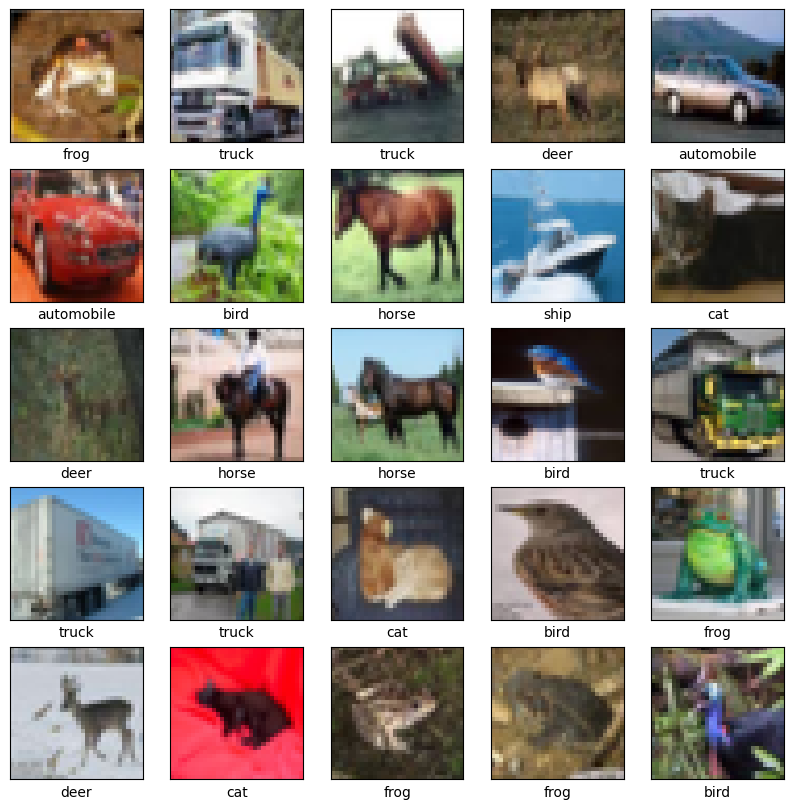

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/nfs/homes/lfarina/Desktop/leaffliction/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1731572542.079935 1765190 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


2024-11-14 09:22:23.194694: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3410 - loss: 1.7896

2024-11-14 09:22:34.392649: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3411 - loss: 1.7893 - val_accuracy: 0.5372 - val_loss: 1.3052
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5632 - loss: 1.2270 - val_accuracy: 0.5912 - val_loss: 1.1503
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6335 - loss: 1.0399 - val_accuracy: 0.6449 - val_loss: 1.0158
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6743 - loss: 0.9196 - val_accuracy: 0.6571 - val_loss: 0.9787
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7067 - loss: 0.8336 - val_accuracy: 0.6930 - val_loss: 0.8894
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7304 - loss: 0.7654 - val_accuracy: 0.6961 - val_loss: 0.8925
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7503 - loss: 0.7117 - val_accuracy: 0.7100 - val_loss: 0.8405
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7610 - loss: 0.6744 - val

2024-11-14 09:24:10.360436: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - 2ms/step - accuracy: 0.7066 - loss: 0.8777


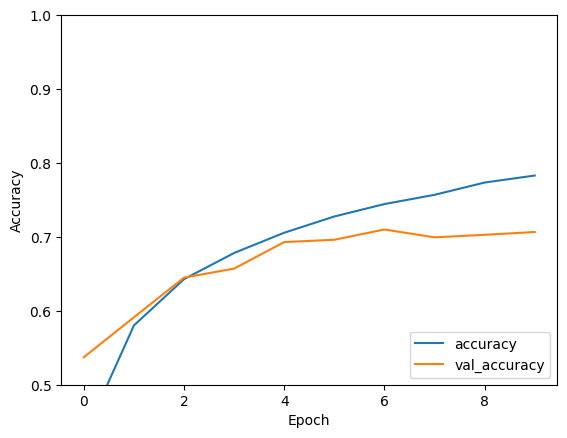

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.70660001039505


In [15]:
model.save('model.keras')
model.save_weights('model.weights.h5')

In [14]:
with open('model.weights.h5', 'r') as file:
    print(file.read())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte